<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/Customer_churn_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import the dependancy**

In [18]:
# import the dependancy
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/learn outside/Churn_Modelling.csv')

In [3]:
# first 5 rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# check the shape of the dataset
data.shape

(10000, 14)

In [5]:
# check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# check the duplicated data
data.duplicated().sum()

0

In [7]:
# check the label column
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**so the data is highlly imbalenced**

In [8]:
# check the 
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
# Drop few columns
data.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# get some dummy columns
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [12]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## **Train test split**

In [14]:
x = data.drop(columns = ['Exited'])
y = data['Exited']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
# transformed the dataset
scaler = StandardScaler()

x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

## **making nural network**

In [39]:
# making nural network 
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [40]:
# Check  the summery
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [41]:
# model compliation
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
# model fitting on the dataset
history = model.fit(x_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5028 - accuracy: 0.7911 - val_loss: 0.4609 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8037 - val_loss: 0.4411 - val_accuracy: 0.8094
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8153 - val_loss: 0.4326 - val_accuracy: 0.8181
Epoch 4/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8230 - val_loss: 0.4193 - val_accuracy: 0.8263
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8352 - val_loss: 0.4046 - val_accuracy: 0.8319
Epoch 6/100
200/200 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.8445 - val_loss: 0.3921 - val_accuracy: 0.8394
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8512 - val_loss: 0.3846 - val_accuracy: 0.8406

In [43]:
# check the waights for last node
model.layers[0].get_weights()

[array([[ 0.02326751, -0.07602905,  0.02012973,  0.30490217,  0.0023182 ,
          0.04230873, -0.10711992, -0.00701761, -0.1276682 , -0.3067844 ,
          0.22380581],
        [-0.38704243,  0.83687204,  0.24417241, -0.01790436,  0.8909243 ,
         -0.7703152 ,  0.5821285 , -0.15567714, -0.6243397 , -0.59369636,
         -0.01697788],
        [-0.18277538, -0.06634053, -0.06369986, -0.03541437,  0.04346834,
         -0.02284123,  0.10296302,  0.3634387 , -0.00844635,  0.21332423,
         -0.34817034],
        [-0.696903  , -0.5935238 ,  0.21339935,  0.06157919, -0.1416748 ,
          0.02626375, -0.17502573, -0.83138436, -0.3091454 ,  0.27808657,
         -0.13238157],
        [ 0.73094296, -0.3946323 ,  1.2775481 , -0.311088  ,  0.129211  ,
          0.47109452,  0.6047029 , -0.22003199,  0.15290117,  0.09710021,
         -0.17437543],
        [-0.00820645, -0.08218113, -0.18663566,  0.43524155, -0.00637746,
          0.14892915, -0.03189394, -0.43955803,  0.28578186, -0.2587556

In [44]:
# predictation
predictation = model.predict(x_test_trf)
predictation

63/63 [==============================] - 0s 1ms/step


array([[0.31496242],
       [0.290934  ],
       [0.10237743],
       ...,
       [0.15845135],
       [0.1595231 ],
       [0.20898744]], dtype=float32)

In [45]:
final_pred = np.where(predictation>0.5,1,0)
final_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [46]:
# check the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_pred)

0.853

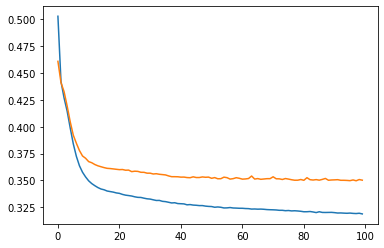

In [47]:
import matplotlib.pyplot as plt

# loss function for train and test 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

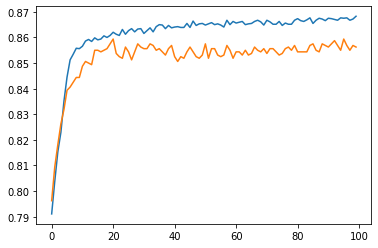

In [48]:
# accuracy score for trainand and test 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])